## Activities


In [2]:
#! pip install opencv-python matplotlib

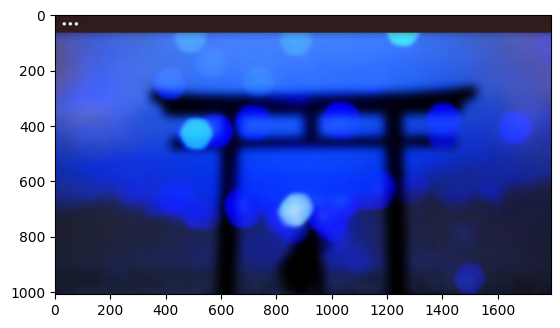

In [1]:
import cv2 as cv2
import matplotlib.pyplot as plt

img = cv2.imread('Images/391d50e3-1268-45e1-aaaa-3cfe6f2fb90d_hero-blur-image-2.avif')

# BGR2RGB
img_to_rbg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

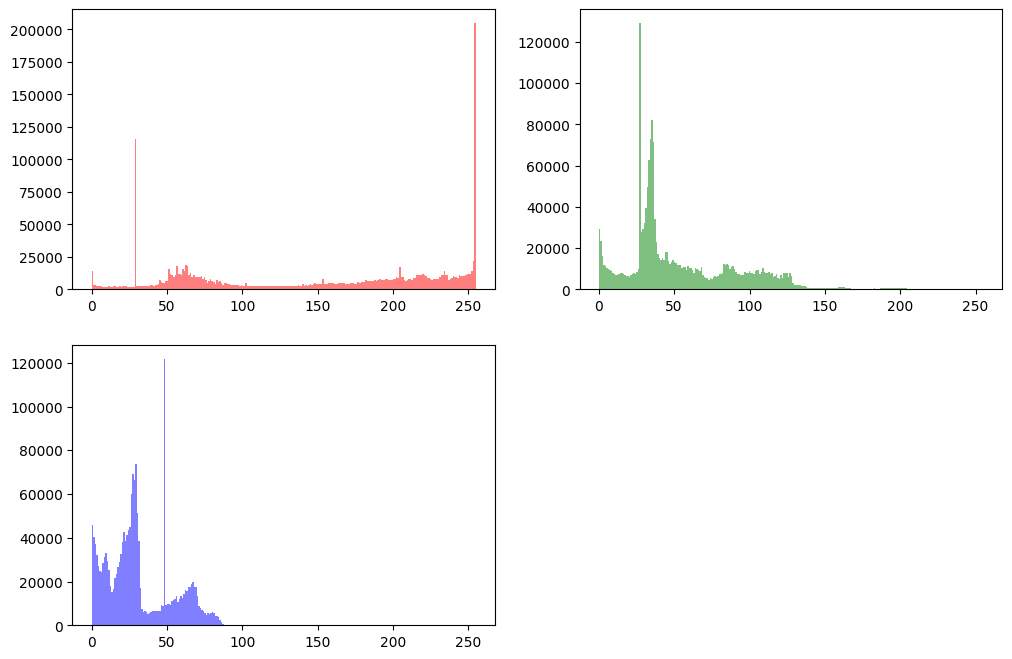

In [2]:
r,g,b = cv2.split(img_to_rbg)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(r.ravel(), color='red', bins=250, alpha=0.5, label='Red')

plt.subplot(2,2,2)
plt.hist(g.ravel(), color='green', bins=256, alpha=0.5, label='Green')

plt.subplot(2,2,3)
plt.hist(b.ravel(), color='blue', bins=256, alpha=0.5, label='Blue')

plt.show()

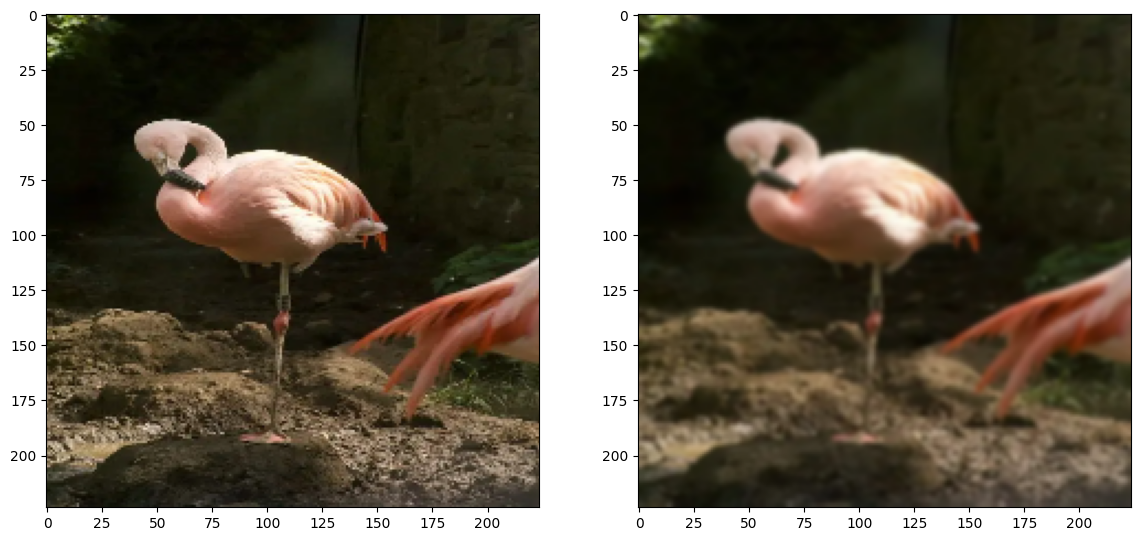

In [3]:
# Applying Gaussian Blur
image_size = (224,224)

img2 = cv2.imread('/Users/hassanfarid/Documents/Study/Comsats University (MS AI)/3rd Semester/Computer Vision/Labs/Code/Images/OIP (2).webp')

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2,image_size)

blurred_img = cv2.GaussianBlur(img2,(5,5),0)

plt.figure(figsize=(14,14))

plt.subplot(1,2,1)
plt.imshow(img2)

plt.subplot(1,2,2)
plt.imshow(blurred_img)

In [4]:
img2.shape

(224, 224, 3)

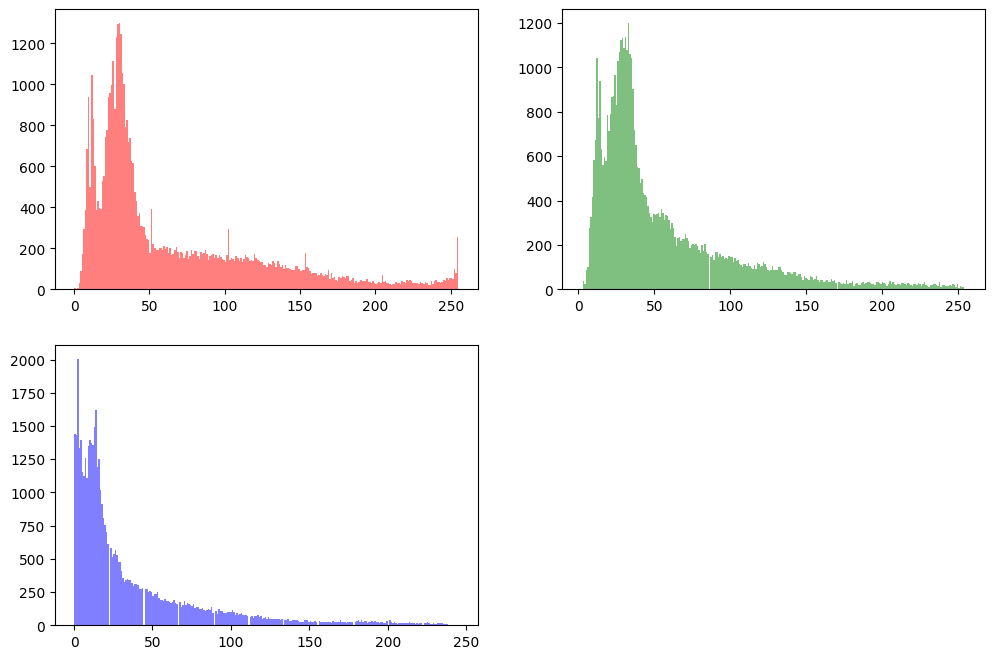

In [5]:
r,g,b = cv2.split(img2)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(r.ravel(), color='red', bins=250, alpha=0.5, label='Red')

plt.subplot(2,2,2)
plt.hist(g.ravel(), color='green', bins=256, alpha=0.5, label='Green')

plt.subplot(2,2,3)
plt.hist(b.ravel(), color='blue', bins=256, alpha=0.5, label='Blue')

plt.show()

# Activity 3: Applying Median Filter

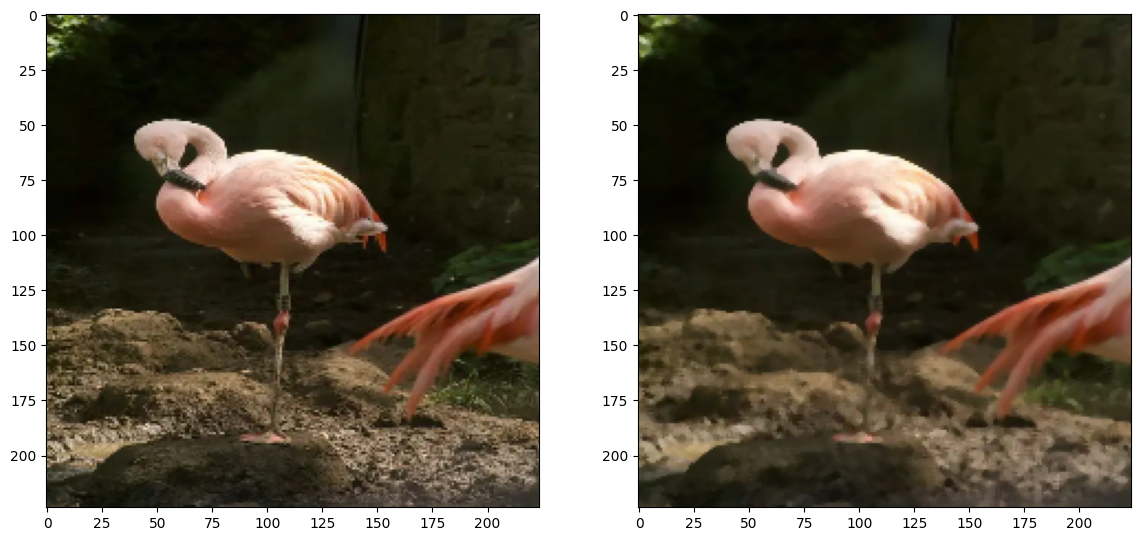

In [6]:
mediam_filtered = cv2.medianBlur(img2,3)


plt.figure(figsize=(14,14))

plt.subplot(1,2,1)
plt.imshow(img2)

plt.subplot(1,2,2)
plt.imshow(mediam_filtered)
plt.show()

### Activity 4: Applying Edge Detection using Sobel Filter

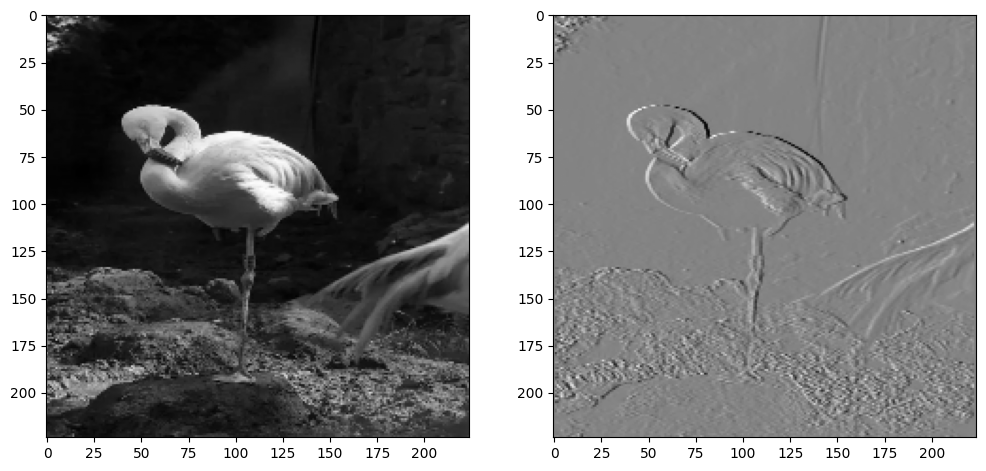

In [16]:
# image to grayscale
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sobel1 = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=1)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(sobel1, cmap='gray')

plt.show()

In [17]:
gray_img.shape

(224, 224)

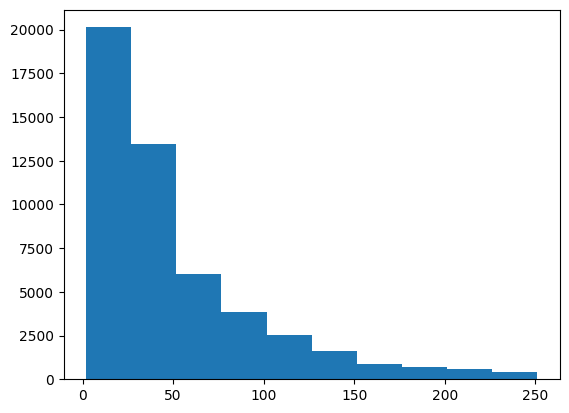

In [18]:
plt.hist(gray_img.ravel())
plt.show()

### Activity 5: Laplacian Filter for Edge Detection

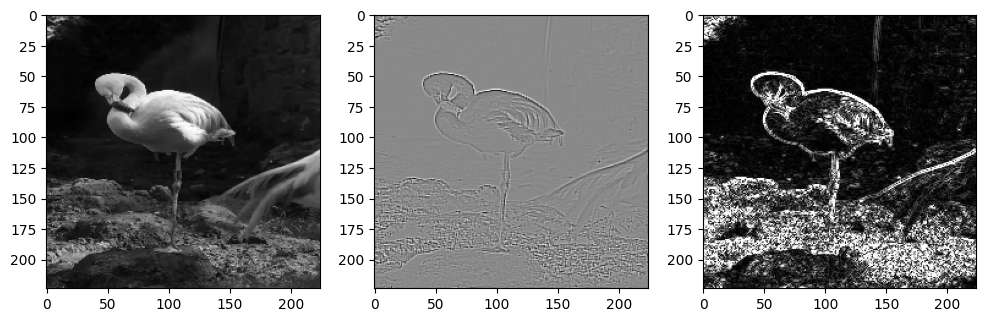

In [30]:
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F, ksize=3)
laplacian2 = cv2.convertScaleAbs(laplacian)  # convert to 8-bit for display

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(laplacian, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(laplacian2, cmap='gray')

plt.show()

### Activity 6: Applying a 3x3 Filter Using a Custom Kernel

In [31]:
import numpy as np

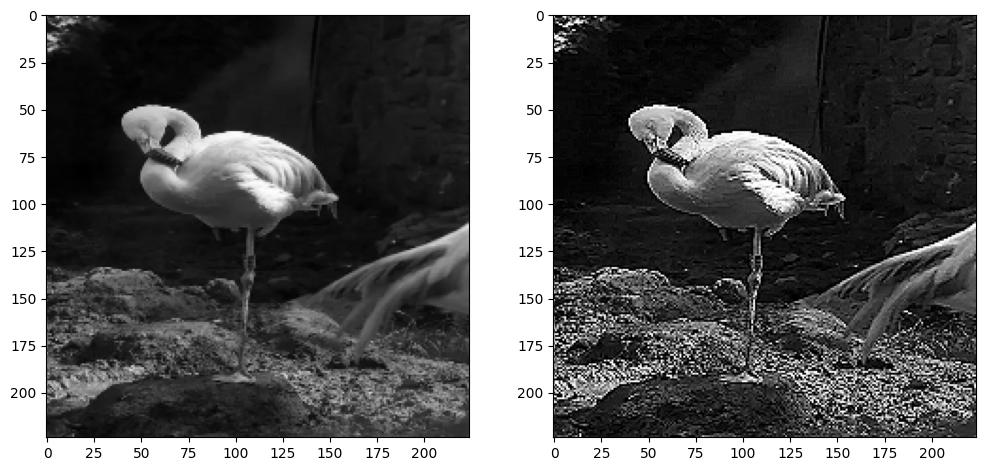

In [32]:
my_kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])


filtered_img = cv2.filter2D(gray_img,-1,my_kernel)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')


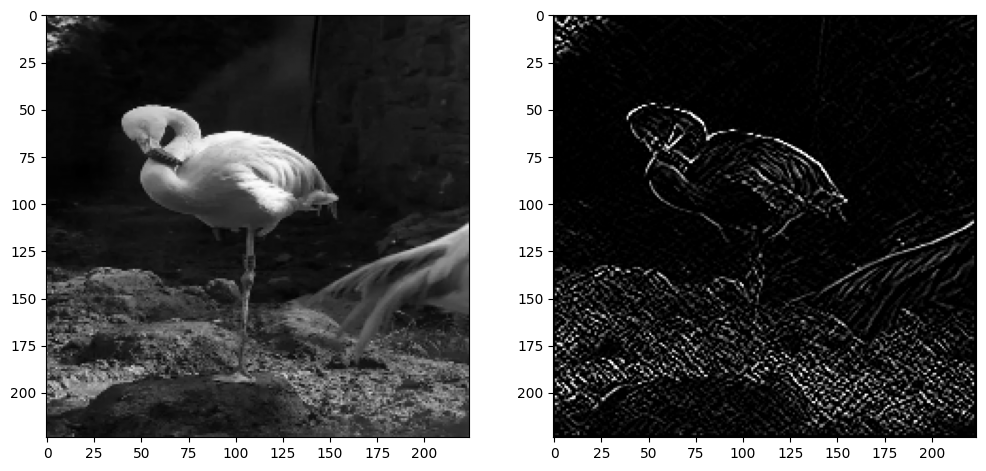

In [53]:
my_kernel = np.array([
    [2,0,-2],
    [0,0,0],
    [-2,0,2]
])

filtered_img = cv2.filter2D(gray_img,-1,my_kernel)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')


## Home Assignment

### Task 2: Custom Kernel for Edge Detection
#### Scenario: Define a custom kernel for edge detection and apply it to an image.


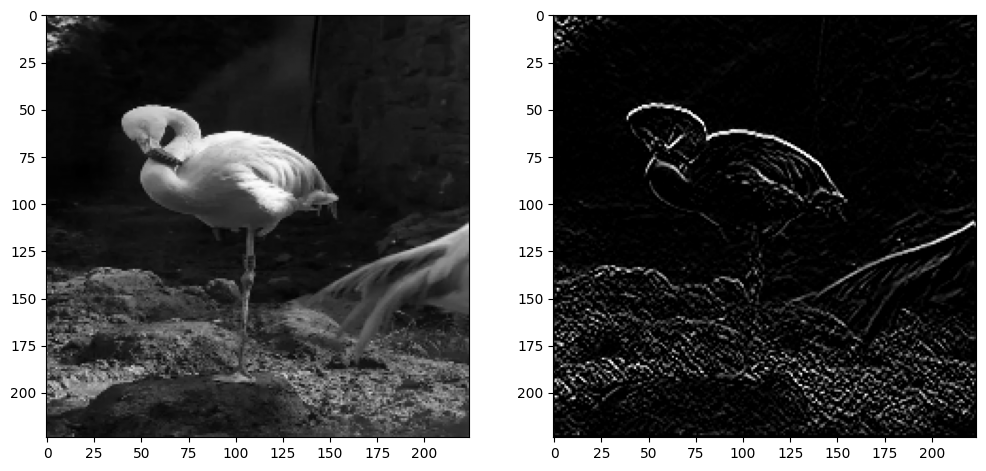

In [62]:
my_kernel = np.array([
    [1,0,-2],
    [0,0,0],
    [-1,0,2]
])

filtered_img = cv2.filter2D(gray_img,-1,my_kernel)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

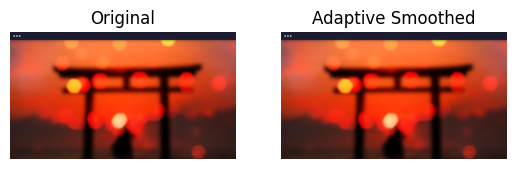

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'Images/391d50e3-1268-45e1-aaaa-3cfe6f2fb90d_hero-blur-image-2.avif'

img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Local variance
mean = cv2.blur(rgb_img, (3,3))
var  = cv2.blur(rgb_img**2, (3,3)) - mean**2

# Blurs
blur3 = cv2.GaussianBlur(rgb_img, (3,3), 0)
blur5 = cv2.GaussianBlur(rgb_img, (5,5), 0)
blur7 = cv2.GaussianBlur(rgb_img, (7,7), 0)

# Adaptive combination
result = np.where(var < 20, blur5, np.where(var < 20, blur5, blur7)).astype(np.uint8)


plt.subplot(1,2,1) 
plt.title("Original") 
plt.imshow(rgb_img, cmap="gray") 
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Adaptive Smoothed")
plt.imshow(result, cmap="gray")
plt.axis("off")

plt.show()


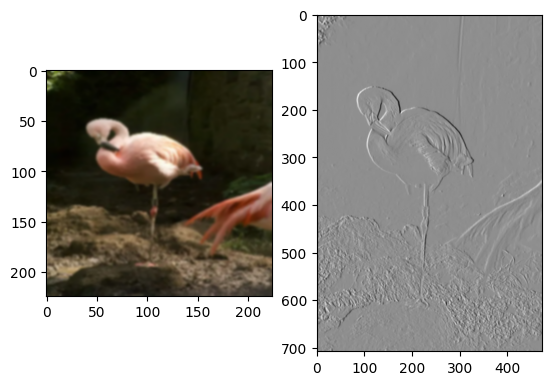

In [82]:
g_blur = cv2.GaussianBlur(img2,(5,5),0)
sobel = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)

plt.subplot(1,2,1)
plt.imshow(g_blur, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(sobel, cmap='gray')

plt.show()
